In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

from matplotlib import pyplot as plt

In [2]:
cars = pd.read_csv("automobile_dataset.csv",encoding='latin-1')
cars.head()
df = cars.copy()

## Data Preprocessing

In [3]:
# replacing NaN values in engV and drive column with median and mode
df["engV"].fillna(df["engV"].median(), inplace=True)
df["drive"].fillna(df["drive"].mode()[0], inplace = True)

#dropping model column
df.drop(columns=["model"], inplace=True)

#dropping rows with mileage or price value as 0
df = df[(df["mileage"]>0) & (df["price"]>0)].reset_index(drop = True)


# substituting year with age as it is more useful to use age
df["age"] = 2020 - df["year"]

# changing regsistration to 0/1 from no/yes
df["registration"] = df["registration"].replace("yes", 1).replace("no", 0)

In [4]:
df.describe()

,price,mileage,engV,registration,year,age
count,9006.000000,9006.000000,9006.000000,9006.000000,9006.000000,9006.000000
mean,14442.404026,145.015656,2.595646,0.938485,2006.217966,13.782034
std,18758.957510,96.385124,5.787551,0.240285,6.908694,6.908694
min,259.350000,1.000000,0.100000,0.000000,1953.000000,4.000000
25%,5262.500000,78.000000,1.600000,1.000000,2004.000000,9.000000
50%,9200.000000,131.000000,2.000000,1.000000,2008.000000,12.000000
75%,16000.000000,198.000000,2.500000,1.000000,2011.000000,16.000000
max,300000.000000,999.000000,99.990000,1.000000,2016.000000,67.000000


In [5]:
# max engV as per the description is 99.9 which isnt possible. Similarly min engV of 0.1 is also not possible
# we filter only the values b/w 1 and 5
df = df[df["engV"].between(1,5,inclusive = True)].reset_index(drop = True)
df.describe()

,price,mileage,engV,registration,year,age
count,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000,8723.000000
mean,13814.549439,145.863464,2.159265,0.937751,2006.219993,13.780007
std,16628.223872,96.434669,0.801167,0.241622,6.911061,6.911061
min,259.350000,1.000000,1.000000,0.000000,1953.000000,4.000000
25%,5300.000000,79.000000,1.600000,1.000000,2004.000000,9.000000
50%,9100.000000,133.000000,2.000000,1.000000,2008.000000,12.000000
75%,15500.000000,200.000000,2.500000,1.000000,2011.000000,16.000000
max,300000.000000,999.000000,5.000000,1.000000,2016.000000,67.000000


In [6]:
df.sort_values(by = "price")

,car,price,body,mileage,engV,engType,registration,year,drive,age
4530,GAZ,259.350,sedan,1,2.4,Other,1,1959,rear,61
5860,Moskvich-AZLK,280.000,sedan,99,1.5,Petrol,1,1976,rear,44
6866,Moskvich-AZLK,350.000,sedan,100,2.0,Other,1,1985,front,35
7488,ZAZ,370.500,sedan,3,1.1,Petrol,1,1989,rear,31
4431,VAZ,389.025,vagon,1,1.3,Petrol,1,1983,front,37
...,...,...,...,...,...,...,...,...,...,...
3250,Mercedes-Benz,169000.000,other,1,4.7,Petrol,1,2015,full,5
2210,Tesla,185000.000,crossover,1,2.0,Other,1,2016,full,4
30,Mercedes-Benz,200000.000,van,19,3.5,Petrol,1,2013,rear,7
6691,Ferrari,205000.000,other,12,4.5,Petrol,1,2012,rear,8


In [7]:
num_attributes = ["price", "mileage", "engV", "age"]
cat_val = ["car", "body", "engType", "drive"]

# analysing the number of unique values in categorical features
for col in cat_val:
    print ([col]," : ",len(df[col].unique()), " : ", df[col].unique())

['car']  :  83  :  ['Ford' 'Mercedes-Benz' 'Nissan' 'Honda' 'Renault' 'BMW' 'Volkswagen'
 'Audi' 'Chrysler' 'Jaguar' 'Mitsubishi' 'Porsche' 'Kia' 'Toyota'
 'Hyundai' 'Opel' 'Chevrolet' 'Skoda' 'Land Rover' 'Daewoo' 'Mazda'
 'Lexus' 'Infiniti' 'Subaru' 'VAZ' 'Alfa Romeo' 'Smart' 'Tesla' 'Peugeot'
 'Suzuki' 'Chery' 'Volvo' 'SsangYong' 'Fiat' 'ZAZ' 'Citroen' 'Jeep'
 'Great Wall' 'Seat' 'MINI' 'Dacia' 'Hummer' 'Geely' 'Maserati' 'BYD'
 'Acura' 'Rover' 'GAZ' 'Lincoln' 'Moskvich-AZLK' 'FAW' 'UAZ' 'ËUAZ'
 'Dodge' 'TATA' 'ZX' 'Lifan' 'Mercury' 'Groz' 'Moskvich-Izh' 'Saab'
 'Lancia' 'Aro' 'Ferrari' 'Isuzu' 'Bogdan' 'Dadi' 'Other-Retro' 'MG'
 'Samand' 'JAC' 'Samsung' 'Lamborghini' 'Daihatsu' 'Hafei' 'SMA'
 'Cadillac' 'Changan' 'GMC' 'Barkas' 'Huanghai' 'Wartburg' 'Buick']
['body']  :  6  :  ['crossover' 'sedan' 'van' 'vagon' 'hatch' 'other']
['engType']  :  4  :  ['Gas' 'Diesel' 'Other' 'Petrol']
['drive']  :  3  :  ['full' 'rear' 'front']


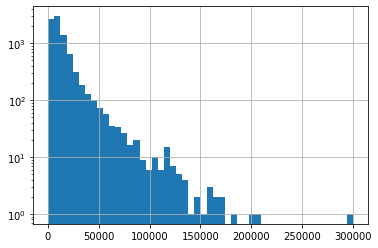

In [8]:
df["price"].hist(bins = 50, log = True)

In [9]:
# removing outlier price(above 210000)
df = df[df["price"].between(100,210000,inclusive = True)]

In [10]:
# brand vs mean price. We observe premium brand cars greatly affect the price
df.groupby("car").mean().sort_values(by = "price")

,price,mileage,engV,registration,year,age
car,,,,,,
Wartburg,1000.000000,90.000000,1.300000,1.000000,1989.000000,31.000000
Moskvich-Izh,1176.102590,102.600000,1.660000,1.000000,2000.800000,19.200000
Moskvich-AZLK,1860.000000,88.600000,1.620000,1.000000,1981.800000,38.200000
Lancia,2166.666667,180.333333,2.233333,0.666667,1994.000000,26.000000
ËUAZ,2709.350000,45.400000,1.460000,1.000000,1993.200000,26.800000
...,...,...,...,...,...,...
Porsche,50552.096386,76.554217,3.908313,0.987952,2010.325301,9.674699
Tesla,84893.750000,14.500000,1.937500,1.000000,2014.187500,5.812500
Maserati,110000.000000,11.000000,4.700000,1.000000,2014.000000,6.000000


In [11]:
# correlation between numerical values. Correlation close to one means values are highly correlated.
# engV and age have highest correlation to price
df.corr()

,price,mileage,engV,registration,year,age
price,1.000000,-0.336407,0.493203,0.154181,0.441474,-0.441474
mileage,-0.336407,1.000000,0.078727,-0.220436,-0.464587,0.464587
engV,0.493203,0.078727,1.000000,-0.032596,0.032151,-0.032151
registration,0.154181,-0.220436,-0.032596,1.000000,0.176402,-0.176402
year,0.441474,-0.464587,0.032151,0.176402,1.000000,-1.000000
age,-0.441474,0.464587,-0.032151,-0.176402,-1.000000,1.000000


In [12]:
results = pd.DataFrame(columns=["R-Squared(train)", "RMSE(train)", "R-squared(test)", "RMSE(test)"])

## Model building - baseline model using logistic regression

In [13]:
X = df[['age','mileage','engV', 'registration']] #independent variables
y = df['price'] #dependent (target) variable

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size = 0.2)

In [15]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
score_train = linreg.score(X_train, y_train)

#root mean squared error on train set
y_pred_train = linreg.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)

print("R-squared score on train set:", score_train)  # r squared score on train set
print("Root mean-squared error on test set:", lin_rmse_train)


# r squared score on test set
score_test = linreg.score(X_test, y_test)

# mean squared error on test set
y_pred = linreg.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred)
lin_rmse_test = np.sqrt(lin_mse_test)
print("R-squared score on test set:", score_test)
print("Root mean-squared error on test set:", lin_rmse_test)

results.loc["Logistic Regression"] = [score_train, lin_rmse_train, score_test, lin_rmse_test]

R-squared score on train set: 0.46978616486619884
Root mean-squared error on test set: 11982.617108898457
R-squared score on test set: 0.4649704822734466
Root mean-squared error on test set: 11618.689792783674


## Random Forest  model using numerical features 

In [17]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [18]:
#r-squared score
score_train = regr.score(X_train, y_train)
#root mean squared error on train set
y_pred_train = regr.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)
print('R-squared score on train set: {:.3f}'.format(score_train))
print("Root mean-squared error on test set:", lin_rmse_train)

score_test = regr.score(X_test, y_test)
y_pred = regr.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred)
lin_rmse_test = np.sqrt(lin_mse_test)
print('R-squared score on test set: {:.3f}'.format(score_test))
print("Root mean-squared error on test set:", lin_rmse_test)

results.loc["Random Forest"] = [score_train, lin_rmse_train, score_test, lin_rmse_test]

R-squared score on train set: 0.886
Root mean-squared error on test set: 5555.985178470757
R-squared score on test set: 0.801
Root mean-squared error on test set: 7079.402187874345


In [19]:
results

,R-Squared(train),RMSE(train),R-squared(test),RMSE(test)
Logistic Regression,0.469786,11982.617109,0.464970,11618.689793
Random Forest,0.886009,5555.985178,0.801365,7079.402188


## Random forest with categorical and numerical features

In [20]:
#Adding one hot encoded values for categorical features
for f in cat_val:
    df = df.join(pd.get_dummies(df[f]))

In [21]:
df.head()

,car,price,body,mileage,engV,engType,registration,year,drive,age,...,sedan,vagon,van,Diesel,Gas,Other,Petrol,front,full,rear
0,Ford,15500.0,crossover,68,2.5,Gas,1,2010,full,10,...,0,0,0,0,1,0,0,0,1,0
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,1,2011,rear,9,...,1,0,0,0,1,0,0,0,0,1
2,Mercedes-Benz,17800.0,van,162,1.8,Diesel,1,2012,front,8,...,0,0,1,1,0,0,0,1,0,0
3,Mercedes-Benz,33000.0,vagon,91,2.0,Other,1,2013,front,7,...,0,1,0,0,0,1,0,1,0,0
4,Nissan,16600.0,crossover,83,2.0,Petrol,1,2013,full,7,...,0,0,0,0,0,0,1,0,1,0


In [22]:
# Adding one hot encoded categorical features
one_hot_cols = np.array([])
for col in cat_val:
    one_hot_cols = np.append(one_hot_cols,df[col].unique())

In [23]:
features = ['age','mileage','engV', 'registration'] + list(one_hot_cols)

In [24]:
X = df[features] #independent variables
y = df['price'] #dependent (target) variable

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18, test_size = 0.2)

In [26]:
regr = RandomForestRegressor(max_depth=25, random_state=0, n_estimators=15)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
#r-squared score
score_train = regr.score(X_train, y_train)
#root mean squared error on train set
y_pred_train = regr.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)
print('R-squared score on train set: {:.3f}'.format(score_train))
print("Root mean-squared error on test set:", lin_rmse_train)

score_test = regr.score(X_test, y_test)
y_pred = regr.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred)
lin_rmse_test = np.sqrt(lin_mse_test)
print('R-squared score on test set: {:.3f}'.format(score_test))
print("Root mean-squared error on test set:", lin_rmse_test)

results.loc["Random Forest with categorical"] = [score_train, lin_rmse_train, score_test, lin_rmse_test]

R-squared score on train set: 0.978
Root mean-squared error on test set: 2429.6940398186757
R-squared score on test set: 0.925
Root mean-squared error on test set: 4352.787412708286


## Results and conclusion

In [28]:
results

,R-Squared(train),RMSE(train),R-squared(test),RMSE(test)
Logistic Regression,0.469786,11982.617109,0.464970,11618.689793
Random Forest,0.886009,5555.985178,0.801365,7079.402188
Random Forest with categorical,0.978200,2429.694040,0.924907,4352.787413


In [29]:
# Feature importance scores for top 10 features
feature_importances = regr.feature_importances_
sorted(zip(feature_importances, features), reverse = True)[:10]

[(0.39289031417232007, 'age'),
 (0.2942976131588131, 'engV'),
 (0.10178536914776275, 'mileage'),
 (0.037325244189808635, 'front'),
 (0.033255145738501204, 'Tesla'),
 (0.019330153232891206, 'Mercedes-Benz'),
 (0.016515409001454734, 'full'),
 (0.010664756209276075, 'BMW'),
 (0.009384815448338513, 'Land Rover'),
 (0.009107892077904807, 'Lamborghini')]

## Predict

In [58]:
def get_cat():
    ret = dict()
    for attr in cat_val:
        print("Options: ", df[attr].unique())
        ret[attr] = input("Please enter "+ attr+ ": ")
    return ret

def get_num():
    ret = dict()
    for attr in num_attributes:
        if attr == "price":
            continue
        ret[attr] = input("Please enter "+ attr+ ": ")
    return ret

def predict():
    X = pd.DataFrame(np.zeros((1, len(X_train.columns))), columns=list(X_train.columns))
    cat_vals = get_cat()
    num_vals = get_num()
    
    for attr in num_vals:
        X[attr] = num_vals[attr]
    for attr in cat_vals:
        X[cat_vals[attr]] = 1
    pred = regr.predict(X)
    print("Predicted price of car is:", pred)

In [61]:
cont = 'y'
while(cont == 'y'):
    predict()
    cont = input("predict another car price? 'y' or 'n': ")

Options:  ['Ford' 'Mercedes-Benz' 'Nissan' 'Honda' 'Renault' 'BMW' 'Volkswagen'
 'Audi' 'Chrysler' 'Jaguar' 'Mitsubishi' 'Porsche' 'Kia' 'Toyota'
 'Hyundai' 'Opel' 'Chevrolet' 'Skoda' 'Land Rover' 'Daewoo' 'Mazda'
 'Lexus' 'Infiniti' 'Subaru' 'VAZ' 'Alfa Romeo' 'Smart' 'Tesla' 'Peugeot'
 'Suzuki' 'Chery' 'Volvo' 'SsangYong' 'Fiat' 'ZAZ' 'Citroen' 'Jeep'
 'Great Wall' 'Seat' 'MINI' 'Dacia' 'Hummer' 'Geely' 'Maserati' 'BYD'
 'Acura' 'Rover' 'GAZ' 'Lincoln' 'Moskvich-AZLK' 'FAW' 'UAZ' 'ËUAZ'
 'Dodge' 'TATA' 'ZX' 'Lifan' 'Mercury' 'Groz' 'Moskvich-Izh' 'Saab'
 'Lancia' 'Aro' 'Ferrari' 'Isuzu' 'Bogdan' 'Dadi' 'Other-Retro' 'MG'
 'Samand' 'JAC' 'Samsung' 'Lamborghini' 'Daihatsu' 'Hafei' 'SMA'
 'Cadillac' 'Changan' 'GMC' 'Barkas' 'Huanghai' 'Wartburg' 'Buick']
Please enter car: Mercedes-Benz
Options:  ['crossover' 'sedan' 'van' 'vagon' 'hatch' 'other']
Please enter body: sedan
Options:  ['Gas' 'Diesel' 'Other' 'Petrol']
Please enter engType: Diesel
Options:  ['full' 'rear' 'front']
Please ent